In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [244]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/titanic.csv',usecols=['Age','Fare','Survived'])

In [245]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [247]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')

df['Age'] = impute.fit_transform(df[['Age']])

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [249]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Look the distribution of the data

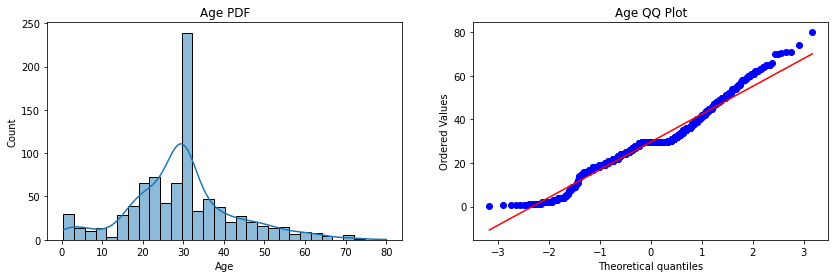

In [250]:
import seaborn as sns
from scipy import stats

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Age'],kde=True)
plt.title('Age PDF')

##QQplot
plt.subplot(122)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')


plt.show()



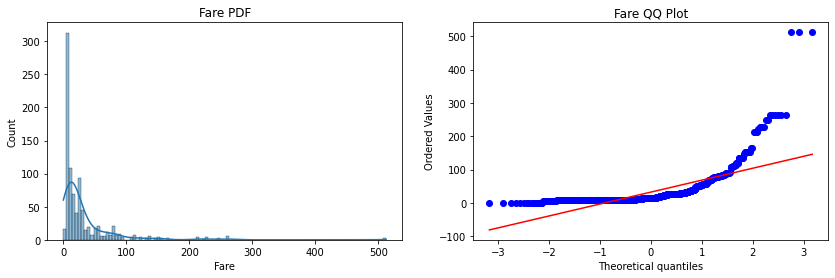

In [251]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Fare'],kde=True)
plt.title('Fare PDF')

## QQ plot
plt.subplot(122)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')


plt.show()

## Before Tansformation Results

In [252]:
X = df.iloc[:,0:]
y = df.iloc[:,0]

In [253]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [254]:
X_train

,Survived,Age,Fare
331,0,45.500000,28.5000
733,0,23.000000,13.0000
382,0,32.000000,7.9250
704,0,26.000000,7.8542
813,0,6.000000,31.2750
...,...,...,...
106,1,21.000000,7.6500
270,0,29.699118,31.0000
860,0,41.000000,14.1083
435,1,14.000000,120.0000


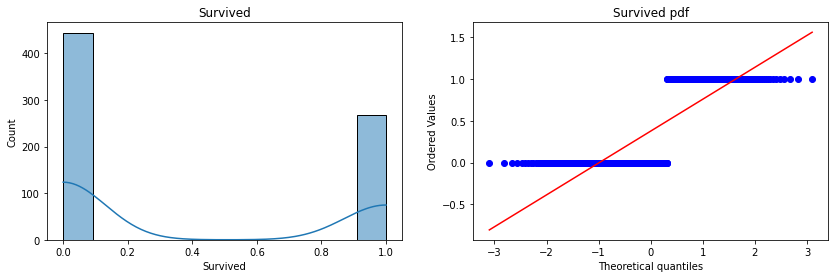

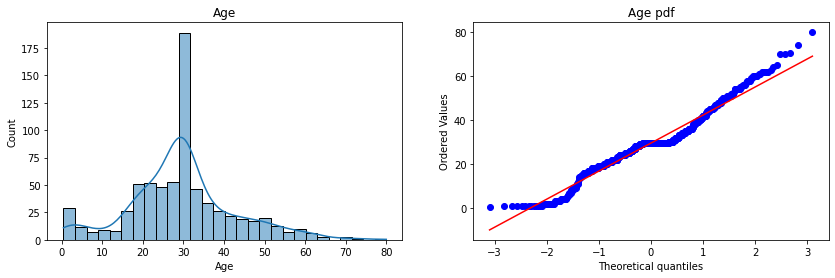

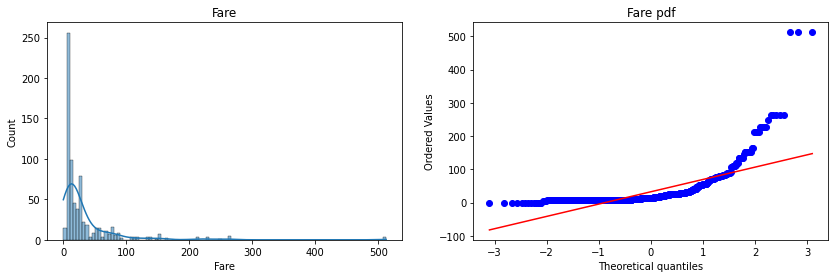

In [255]:
# plotting distribution without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(f"{col} pdf")
    plt.show()

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


#Logisticregressor
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))
print("LR:",np.mean(cross_val_score(lr,X,y,scoring='accuracy',cv=10)))

# Decisiontree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred1 = dt.predict(X_test)

print("Accuracy_score:",accuracy_score(y_test,y_pred1))
print("DT:",np.mean(cross_val_score(dt,X,y,scoring='accuracy',cv=10)))




Accuracy score: 1.0
LR: 1.0
Accuracy_score: 1.0
DT: 1.0


## Applying Function Transformer

In [257]:
# log transformation
from sklearn.preprocessing import FunctionTransformer

ftr = FunctionTransformer(func=np.log1p)

df['Fare'] = ftr.fit_transform(df['Fare'])




# # Apply square transformation
# square_transformer = FunctionTransformer(func=np.square)
# df['Fare'] = square_transformer.fit_transform(df[['Fare']])


# # Apply square root transformation
# sqrt_transformer = FunctionTransformer(func=np.sqrt)
# df['Fare'] = sqrt_transformer.fit_transform(df[['Fare']])


# # Apply reciprocal transformation
# reciprocal_transformer = FunctionTransformer(func=lambda x: 1 / x)
# df['Fare'] = reciprocal_transformer.fit_transform(df[['Fare']])




In [258]:
from sklearn.preprocessing import StandardScaler

slr = StandardScaler()

df['Age'] = slr.fit_transform(df[['Age']])

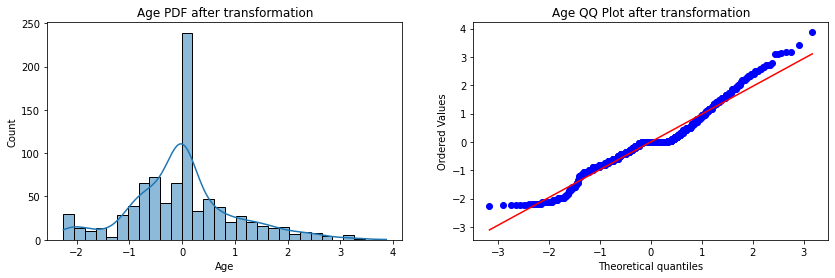

In [259]:
import seaborn as sns
from scipy import stats

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Age'],kde=True)
plt.title('Age PDF after transformation')

##QQplot
plt.subplot(122)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot after transformation')


plt.show()

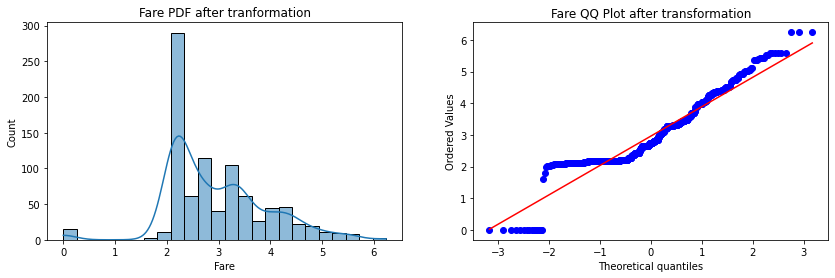

In [260]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Fare'],kde=True)
plt.title('Fare PDF after tranformation')

## QQ plot
plt.subplot(122)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot after transformation')


plt.show()

In [261]:
df.head()

,Survived,Age,Fare
0,0,-0.592481,2.110213
1,1,0.638789,4.280593
2,1,-0.284663,2.188856
3,1,0.407926,3.990834
4,0,0.407926,2.202765


In [262]:
X = df.iloc[:,0:]
y = df.iloc[:,0]

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


#Logisticregressor
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))
print("LR:",np.mean(cross_val_score(lr,X,y,scoring='accuracy',cv=10)))

# Decisiontree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred1 = dt.predict(X_test)

print("Accuracy_score:",accuracy_score(y_test,y_pred1))
print("DT:",np.mean(cross_val_score(dt,X,y,scoring='accuracy',cv=10)))

Accuracy score: 1.0
LR: 1.0
Accuracy_score: 1.0
DT: 1.0


In [265]:
X_train

,Survived,Age,Fare
331,0,1.215947,3.384390
733,0,-0.515526,2.639057
382,0,0.177063,2.188856
704,0,-0.284663,2.180892
813,0,-1.823750,3.474293
...,...,...,...
106,1,-0.669435,2.157559
270,0,0.000000,3.465736
860,0,0.869652,2.715244
435,1,-1.208115,4.795791


## Power Transformers

In [266]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/concrete_data.csv')

In [267]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [268]:
df.shape

(1030, 9)

In [269]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [270]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [271]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [272]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [273]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("r2 socre:",r2_score(y_test,y_pred))

print("lr_cross_val_score:",np.mean(cross_val_score(lr,X,y,scoring='r2')))

r2 socre: 0.6275531792314853
lr_cross_val_score: 0.4609940491662866


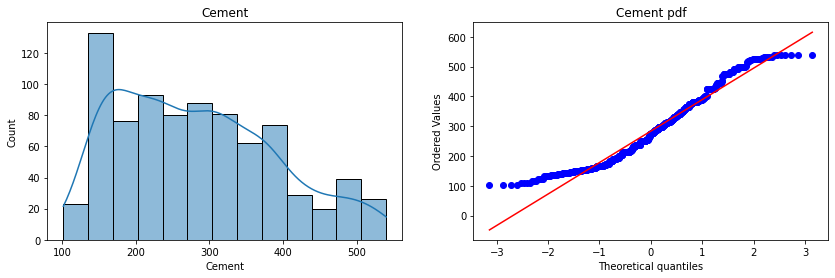

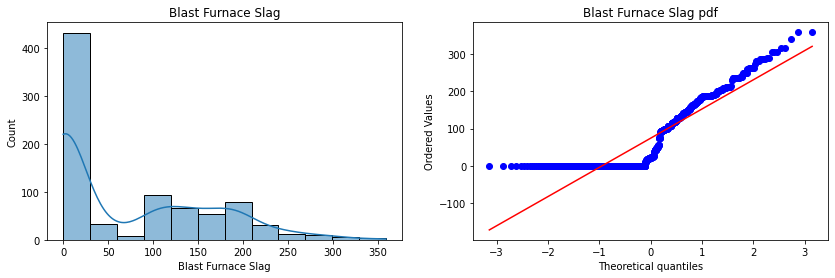

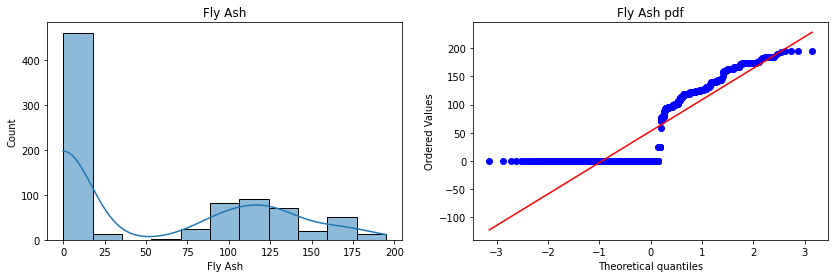

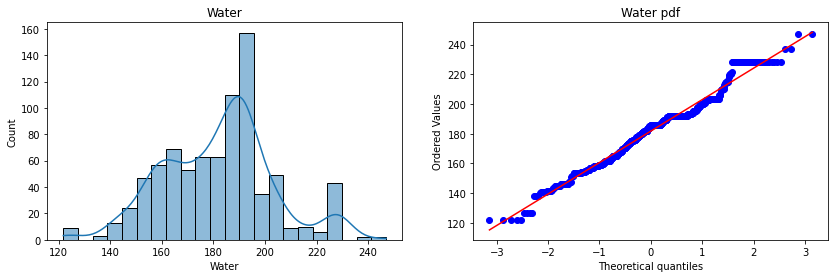

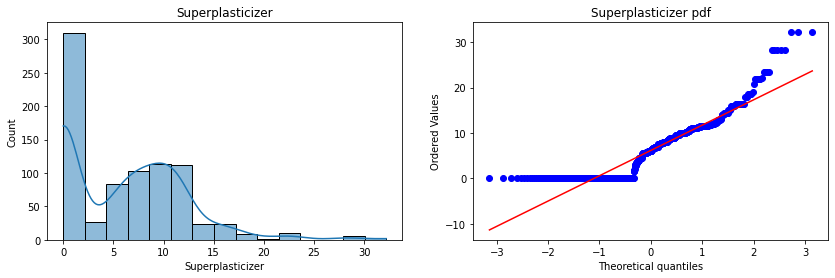

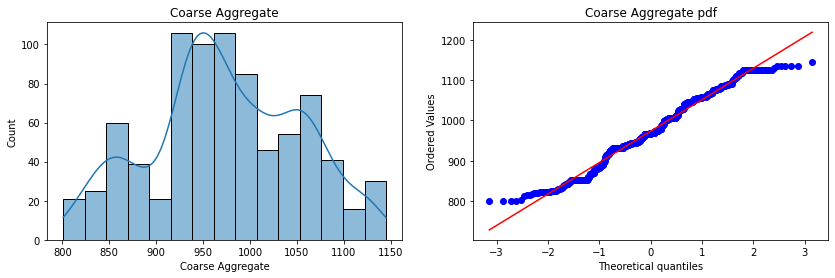

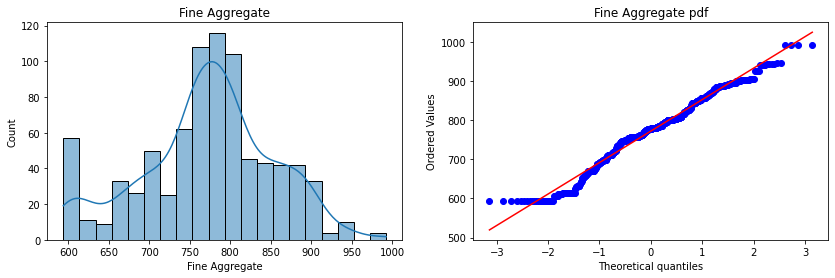

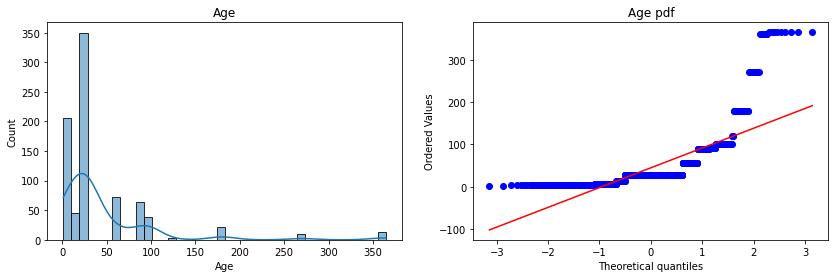

In [275]:
# plotting distribution without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(f"{col} pdf")
    plt.show()

In [276]:
from sklearn.preprocessing import PowerTransformer

pot = PowerTransformer()

X_train_transformed = pot.fit_transform(X_train)
X_test_transformed = pot.fit_transform(X_test)

lr = LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

print(r2_score(y_test,y_pred2))


0.8153845514638945


In [277]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

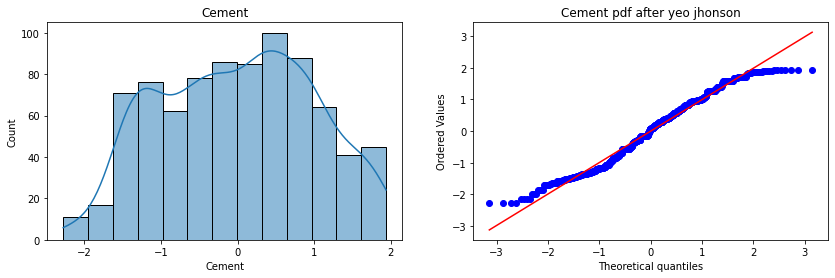

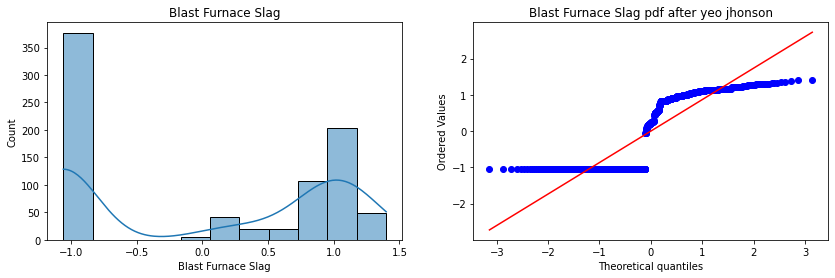

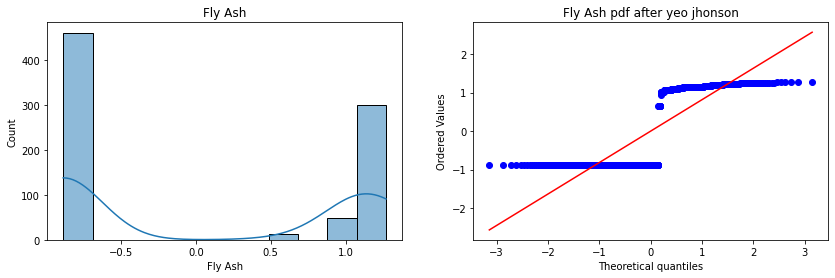

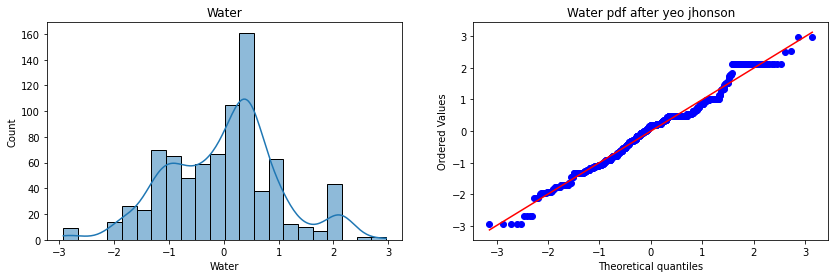

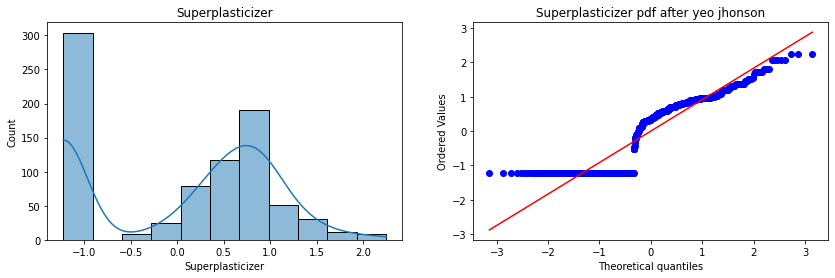

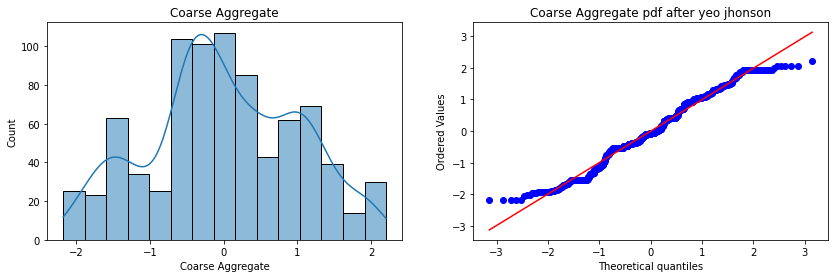

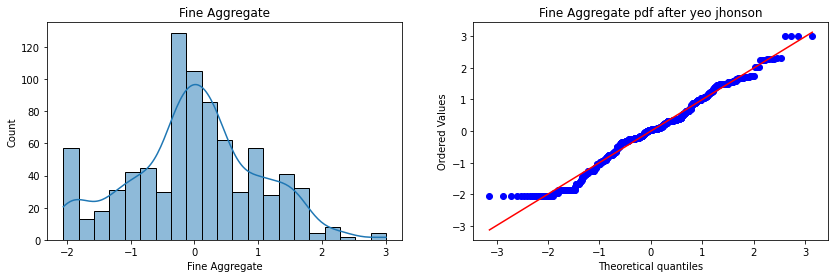

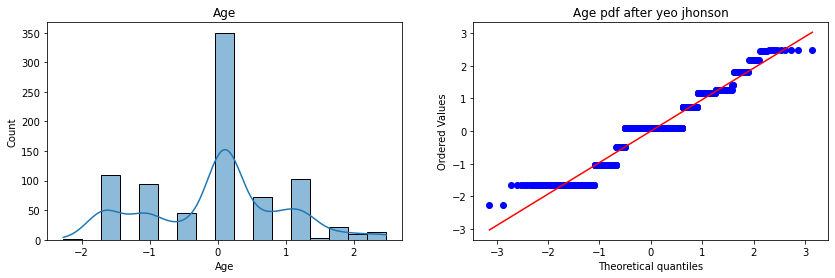

In [278]:
# plotting distribution after yeo jhonson transformation

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title(f"{col} pdf after yeo jhonson")
    plt.show()